<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai_dl/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n = 100

In [8]:
x = torch.ones(n, 2); x
x[:,0].uniform_(-1, 1);
x[:5]

tensor([[-0.4610,  1.0000],
        [ 0.5946,  1.0000],
        [ 0.8182,  1.0000],
        [ 0.4233,  1.0000],
        [-0.0728,  1.0000]])

In [10]:
a = tensor(3., 2); a 

tensor([3., 2.])

In [13]:
y = x@a + torch.rand(n); y

tensor([ 0.9888,  4.1465,  5.4306,  3.9101,  2.4245,  2.1883,  4.1159,  5.1767,
         4.2168,  4.1191,  4.0180,  4.7226,  1.6605,  2.3764,  3.9655,  4.4754,
         5.3888,  2.5540,  0.1071,  5.2592,  0.4471,  3.6703,  2.2381,  1.6088,
         3.1500,  5.4889,  0.9485,  2.2102,  2.3913,  3.3180,  3.8016,  5.6092,
         0.5676,  1.6128,  5.5749,  0.7709,  1.0133,  0.5255,  0.1720,  4.2425,
         4.5805,  2.6056,  3.5494, -0.3848,  1.9100,  2.5489,  1.5706,  5.0965,
         2.7990,  0.6074,  4.5327,  3.5092,  4.7354,  4.6710,  5.2927,  0.1548,
        -0.2852,  3.8111,  2.6113,  5.4380,  4.8890,  0.0702,  4.1326,  1.4506,
         1.5976,  1.3901,  4.9779,  0.9094,  1.4216,  2.7545,  3.4753,  2.2576,
         1.4794,  0.0321,  5.0254,  5.2174,  3.5445,  3.0222,  0.2340,  4.7121,
         3.0000,  0.3346,  4.5322,  2.4041,  4.0587,  1.5578,  5.5191,  4.3862,
         1.0795,  3.4746,  3.6042,  1.0869,  2.8679,  1.8622,  1.5649,  0.7508,
         0.0416,  1.4445,  5.3072,  2.53

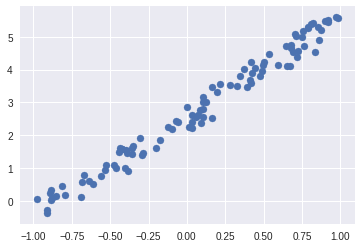

In [14]:
plt.scatter(x[:,0], y);